https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


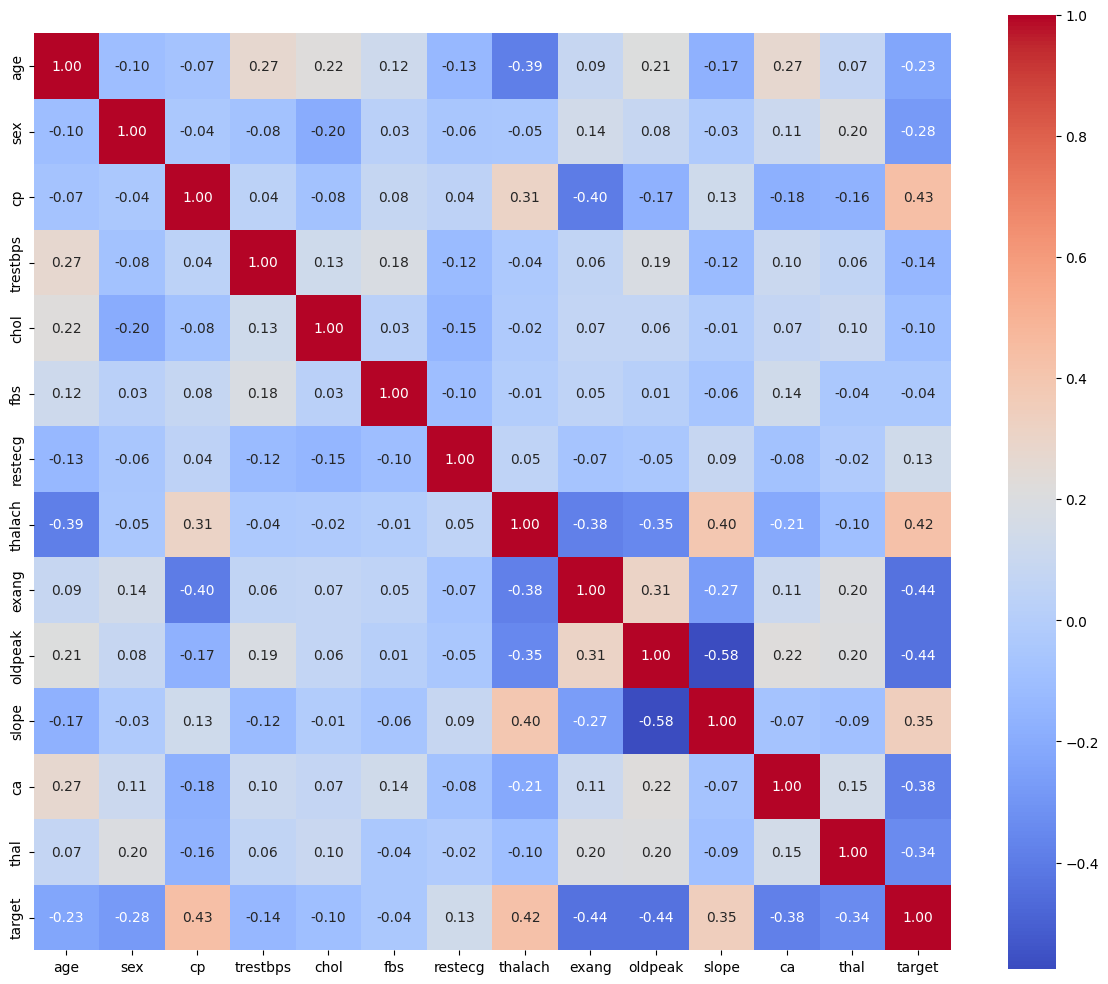

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (excluding non-numeric columns if any)
corr_matrix = df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
#plt.title("Correlation Matrix - Full Dataset", fontsize=16)
plt.tight_layout()

# Save the figure
#plt.savefig("df_correlation_heatmap.png", dpi=300)

# Show the figure
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Feature and target split
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
#    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
results = {}
for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Optional: print sorted summary
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Summary:")
for name, acc in sorted_results:
    print(f"{name}: {acc:.4f}")


Logistic Regression Accuracy: 0.7951
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


K-Nearest Neighbors Accuracy: 0.8341
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


SVM (Linear) Accuracy: 0.8146
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.

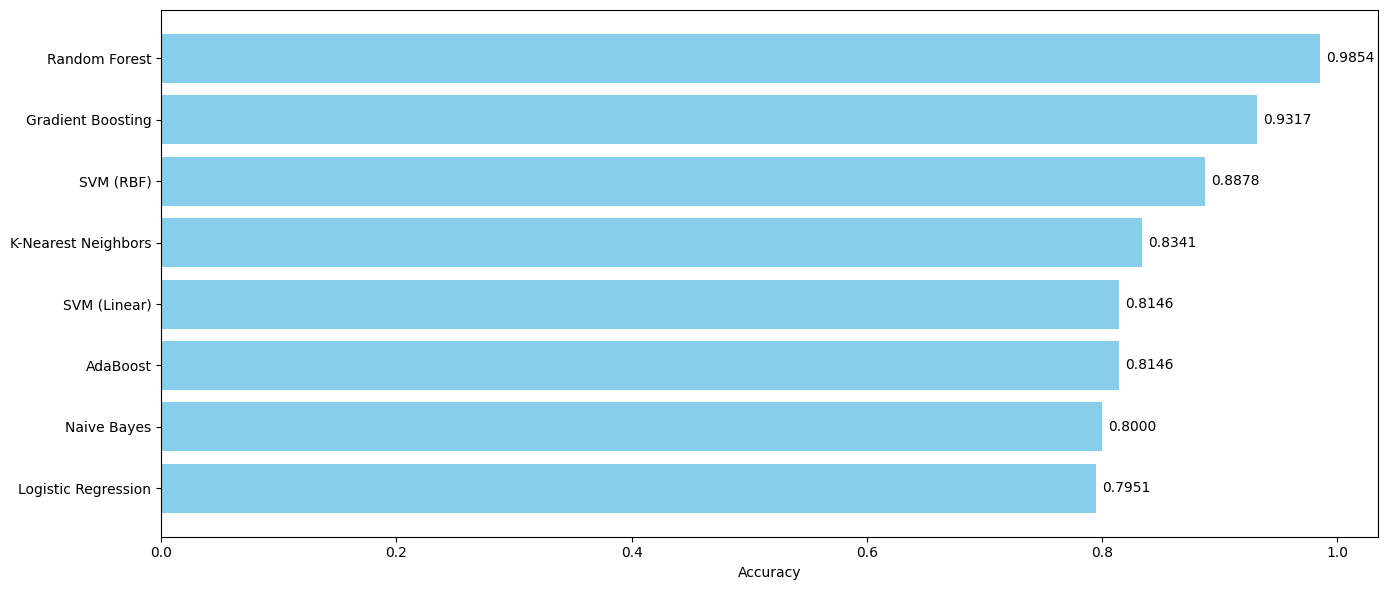

In [ ]:
import matplotlib.pyplot as plt

# Sort results by accuracy for better visualization
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(14, 6))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='skyblue')
plt.xlabel("Accuracy")
#plt.title("Classifier Accuracy Comparison")
plt.gca().invert_yaxis()  # Highest accuracy on top
for i, (name, acc) in enumerate(sorted_results.items()):
    plt.text(acc + 0.005, i, f"{acc:.4f}", va='center')
plt.tight_layout()
#plt.savefig("classifier_accuracy_comparison.png", dpi=300)
plt.show()


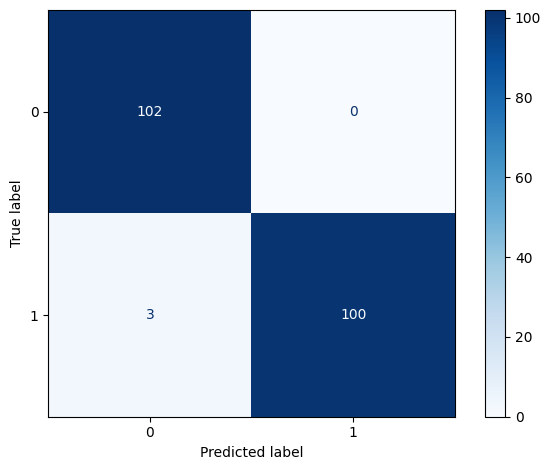

AUC: 0.9679


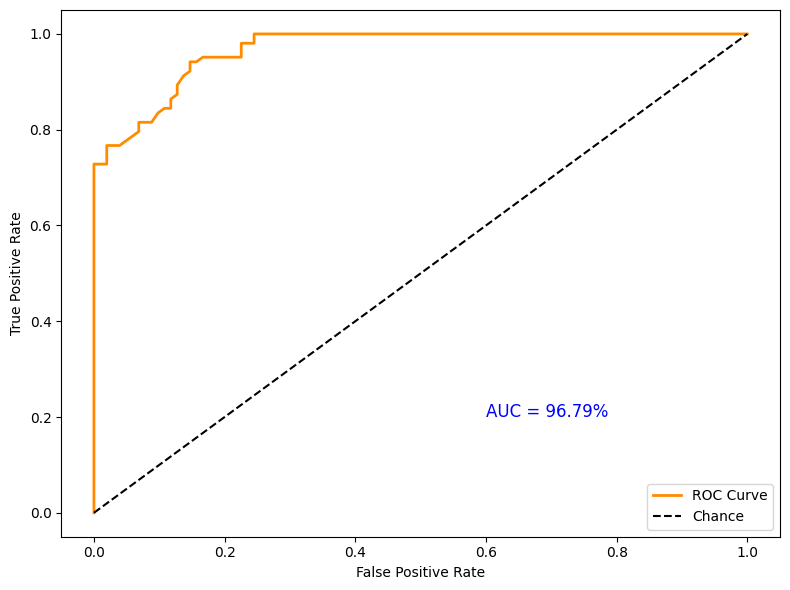

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Fit Random Forest separately if needed
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
#plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.savefig("confusion_matrix_rf.png", dpi=300)
plt.show()

# 7. ROC & AUC
n_classes = len(np.unique(y))
if n_classes == 2:
    y_prob_sel = rf_sel.predict_proba(X_test_sel_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_sel)
    roc_auc = auc(fpr, tpr)
    roc_auc_percent = roc_auc * 100

    # Print AUC
    print(f"AUC: {roc_auc:.4f}")

    # Plot ROC curve with AUC %
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.text(0.6, 0.2, f"AUC = {roc_auc_percent:.2f}%", fontsize=12, color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_auc__features.png", dpi=300)
    plt.show()

else:
    from sklearn.preprocessing import label_binarize

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    y_score_sel = rf_sel.predict_proba(X_test_sel_scaled)

    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_sel[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]*100:.2f}%")
        print(f"Class {i} AUC: {roc_auc[i]:.4f}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC Curve - Selected Features")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("multiclass_roc_auc.png", dpi=300)
    plt.show()


In [ ]:
def fitness_function(binary_mask):
    # Ensure binary_mask is numpy array
    binary_mask = np.array(binary_mask)

    # Mask features
    selected_idx = np.where(binary_mask == 1)[0]
    if len(selected_idx) == 0:
        return 1.0  # worst score (ARO minimizes)

    X_train_sel = X_train.iloc[:, selected_idx]
    X_test_sel = X_test.iloc[:, selected_idx]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)

    return 1 - acc  # lower is better for ARO


In [ ]:
def binary_space_bound(X):
    return (np.random.rand(len(X)) < X).astype(int)

def binary_ARO(max_it, npop, dim):
    # Initialize population with 0s and 1s
    pop_pos = np.random.randint(0, 2, (npop, dim))
    pop_fit = np.zeros(npop)

    for i in range(npop):
        pop_fit[i] = fitness_function(pop_pos[i])

    best_f = np.min(pop_fit)
    best_x = pop_pos[np.argmin(pop_fit)].copy()
    his_best_fit = np.zeros(max_it)

    for it in range(max_it):
        theta = 2 * (1 - (it+1) / max_it)
        new_pop = np.copy(pop_pos)

        for i in range(npop):
            A = 2 * np.log(1 / np.random.rand()) * theta
            if A > 1:
                k = np.delete(np.arange(npop), i)
                rand_ind = np.random.choice(k)
                diff = pop_pos[i] - pop_pos[rand_ind]
                rand_noise = np.random.randn(dim)
                new_pos = pop_pos[rand_ind] + diff + round(0.5 * (0.05 + np.random.rand())) * rand_noise
            else:
                gr = np.zeros(dim)
                gr[np.random.randint(0, dim)] = 1
                H = ((max_it - (it+1) + 1) / max_it) * np.random.randn()
                b = pop_pos[i] + H * gr * pop_pos[i]
                R = np.random.rand(dim)
                new_pos = pop_pos[i] + R * (np.random.rand(dim) * b - pop_pos[i])

            # Convert to binary using sigmoid probability
            sigmoid = 1 / (1 + np.exp(-new_pos))
            new_bin = binary_space_bound(sigmoid)
            new_fit = fitness_function(new_bin)

            if new_fit < pop_fit[i]:
                pop_fit[i] = new_fit
                pop_pos[i] = new_bin

            if pop_fit[i] < best_f:
                best_f = pop_fit[i]
                best_x = new_bin.copy()

        his_best_fit[it] = best_f
        print(f"Iteration {it+1}, Best Accuracy: {1 - best_f:.4f}")

    return best_x, 1 - best_f, his_best_fit


In [ ]:
max_it = 50
npop = 30
dim = X_train.shape[1]  # number of features

best_features_bin, best_acc, history = binary_ARO(max_it, npop, dim)

selected_features = X_train.columns[np.where(best_features_bin == 1)[0]]
print("\nBest selected features:\n", selected_features.tolist())
print("Best accuracy:", best_acc)


Iteration 1, Best Accuracy: 1.0000
Iteration 2, Best Accuracy: 1.0000
Iteration 3, Best Accuracy: 1.0000
Iteration 4, Best Accuracy: 1.0000
Iteration 5, Best Accuracy: 1.0000
Iteration 6, Best Accuracy: 1.0000
Iteration 7, Best Accuracy: 1.0000
Iteration 8, Best Accuracy: 1.0000
Iteration 9, Best Accuracy: 1.0000
Iteration 10, Best Accuracy: 1.0000
Iteration 11, Best Accuracy: 1.0000
Iteration 12, Best Accuracy: 1.0000
Iteration 13, Best Accuracy: 1.0000
Iteration 14, Best Accuracy: 1.0000
Iteration 15, Best Accuracy: 1.0000
Iteration 16, Best Accuracy: 1.0000
Iteration 17, Best Accuracy: 1.0000
Iteration 18, Best Accuracy: 1.0000
Iteration 19, Best Accuracy: 1.0000
Iteration 20, Best Accuracy: 1.0000
Iteration 21, Best Accuracy: 1.0000
Iteration 22, Best Accuracy: 1.0000
Iteration 23, Best Accuracy: 1.0000
Iteration 24, Best Accuracy: 1.0000
Iteration 25, Best Accuracy: 1.0000
Iteration 26, Best Accuracy: 1.0000
Iteration 27, Best Accuracy: 1.0000
Iteration 28, Best Accuracy: 1.0000
I

In [ ]:
# Prepare tracking lists
results = []

max_it = 50
npop = 30
dim = X_train.shape[1]  # number of features
feature_names = X_train.columns

# Run ARO 10 times
for run in range(1, 11):
    print(f"\nRunning binary_ARO - Round {run}")
    best_features_bin, best_acc, history = binary_ARO(max_it, npop, dim)

    selected_idx = np.where(best_features_bin == 1)[0]
    selected_features = feature_names[selected_idx].tolist()

    # Store results in a dictionary
    results.append({
        "Round": run,
        "Selected Features": selected_features,
        "Best Accuracy": best_acc
    })

    print(f"Round {run} - Best Accuracy: {best_acc:.4f}")
    print("Selected Features:", selected_features)

# Convert results to DataFrame for easy analysis
import pandas as pd
results_df = pd.DataFrame(results)

# Display summary
print("\nSummary of 10 ARO Rounds:")
print(results_df)



Running binary_ARO - Round 1
Iteration 1, Best Accuracy: 1.0000
Iteration 2, Best Accuracy: 1.0000
Iteration 3, Best Accuracy: 1.0000
Iteration 4, Best Accuracy: 1.0000
Iteration 5, Best Accuracy: 1.0000
Iteration 6, Best Accuracy: 1.0000
Iteration 7, Best Accuracy: 1.0000
Iteration 8, Best Accuracy: 1.0000
Iteration 9, Best Accuracy: 1.0000
Iteration 10, Best Accuracy: 1.0000
Iteration 11, Best Accuracy: 1.0000
Iteration 12, Best Accuracy: 1.0000
Iteration 13, Best Accuracy: 1.0000
Iteration 14, Best Accuracy: 1.0000
Iteration 15, Best Accuracy: 1.0000
Iteration 16, Best Accuracy: 1.0000
Iteration 17, Best Accuracy: 1.0000
Iteration 18, Best Accuracy: 1.0000
Iteration 19, Best Accuracy: 1.0000
Iteration 20, Best Accuracy: 1.0000
Iteration 21, Best Accuracy: 1.0000
Iteration 22, Best Accuracy: 1.0000
Iteration 23, Best Accuracy: 1.0000
Iteration 24, Best Accuracy: 1.0000
Iteration 25, Best Accuracy: 1.0000
Iteration 26, Best Accuracy: 1.0000
Iteration 27, Best Accuracy: 1.0000
Iterati

In [ ]:
from collections import Counter

# Flatten all selected features from each round
all_selected = sum(results_df["Selected Features"], [])  # Combines all lists

# Count occurrences
feature_counts = Counter(all_selected)

# Convert to DataFrame and sort
feature_freq_df = pd.DataFrame(feature_counts.items(), columns=["Feature", "Count"])
feature_freq_df = feature_freq_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

print("\nFeature Selection Frequency Across 10 ARO Rounds:")
print(feature_freq_df)



Feature Selection Frequency Across 10 ARO Rounds:
     Feature  Count
0       thal      8
1      exang      7
2    thalach      7
3        sex      7
4    restecg      6
5      slope      6
6   trestbps      5
7        age      4
8    oldpeak      4
9         ca      4
10      chol      3
11        cp      3
12       fbs      2


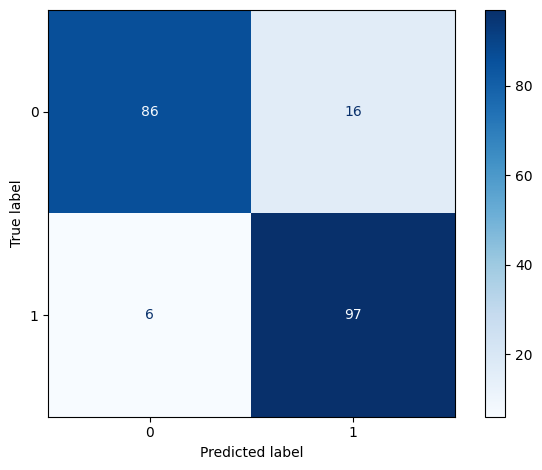


===== Evaluation Summary (Selected Features) =====
Selected Features: ['thal', 'exang', 'thalach', 'sex']
Accuracy: 0.8927
Confusion Matrix:
[[86 16]
 [ 6 97]]
AUC: 0.9679


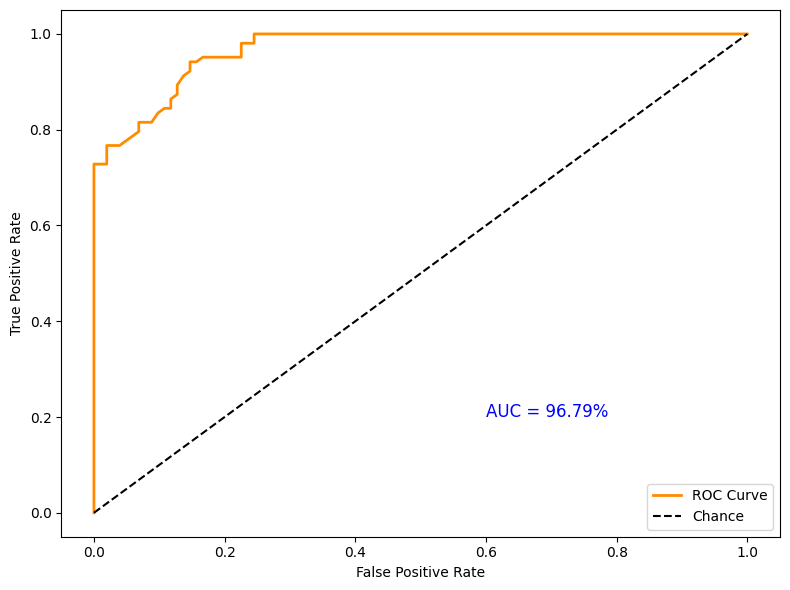

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# --- Selected features manually defined ---
selected_features = ["thal", "exang", "thalach", "sex"]

# 1. Use selected features from X_train and X_test
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# 2. Scale the selected feature subsets
scaler = StandardScaler()
X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.transform(X_test_sel)

# 3. Train Random Forest on selected features
rf_sel = RandomForestClassifier(random_state=42)
rf_sel.fit(X_train_sel_scaled, y_train)
y_pred_sel = rf_sel.predict(X_test_sel_scaled)

# 4. Accuracy
accuracy = accuracy_score(y_test, y_pred_sel)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_sel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.tight_layout()
plt.savefig("confusion_matrix_selected_features.png", dpi=300)
plt.show()

# Print Confusion Matrix
print("\n===== Evaluation Summary (Selected Features) =====")
print(f"Selected Features: {selected_features}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)

# 6. ROC & AUC
n_classes = len(np.unique(y))
if n_classes == 2:
    y_prob_sel = rf_sel.predict_proba(X_test_sel_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_sel)
    roc_auc = auc(fpr, tpr)
    roc_auc_percent = roc_auc * 100

    # Print AUC
    print(f"AUC: {roc_auc:.4f}")

    # Plot ROC curve with AUC %
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.text(0.6, 0.2, f"AUC = {roc_auc_percent:.2f}%", fontsize=12, color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_auc_selected_features.png", dpi=300)
    plt.show()

else:
    from sklearn.preprocessing import label_binarize

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    y_score_sel = rf_sel.predict_proba(X_test_sel_scaled)

    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_sel[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]*100:.2f}%")
        print(f"Class {i} AUC: {roc_auc[i]:.4f}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("multiclass_roc_auc_selected_features.png", dpi=300)
    plt.show()
